# Ejercicio: Aplicar PCA al dataset mpg(coches)
-Aplicar PCA
-Qué proporción de la variabilidad de los datos explica cada componente PCA
-Cuantos componentes  pca 

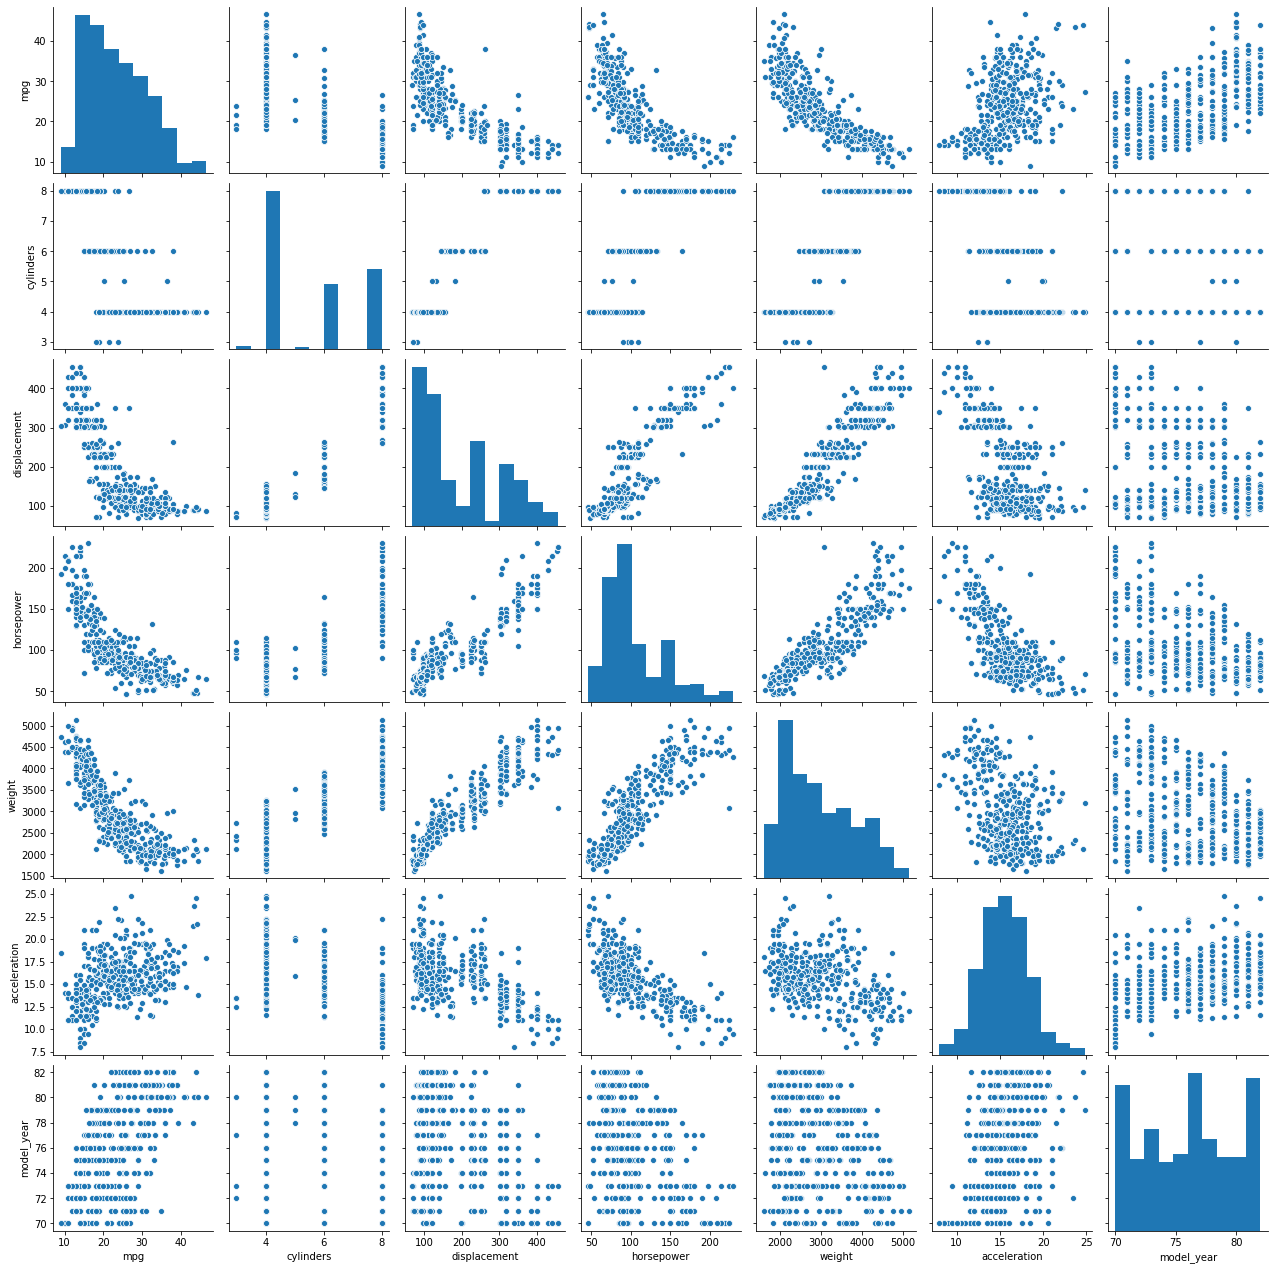

In [21]:
import pandas as pd
import seaborn as sns

mpg = sns.load_dataset("mpg")
mpg_num=mpg.select_dtypes(include='number')
mpg_num_nonans=mpg_num.dropna()
mpg_num.shape

sns.pairplot(mpg)

In [38]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [0]:
X=mpg_num_nonans[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]
y = mpg['name'] 

In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

In [29]:
XS.shape

(392, 7)

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4).fit(XS)

In [35]:
Xproj = pca.transform(XS)
Xproj.shape

(392, 4)

In [36]:
print('Valores propios = {} {} {} {}'.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {} {} {}'.format(*pca.explained_variance_ratio_))

Valores propios = 5.023450750382199 0.8678051844996093 0.7302566706735852 0.18438546525537886
Fracción de la varianza explicada = 0.7158051178569386 0.12365591368052012 0.10405625300049992 0.02627358488150624


In [31]:
100*pca.explained_variance_ratio_.cumsum()

array([71.58051179, 83.94610315, 94.35172845, 96.97908694])

In [32]:
100*pca.explained_variance_ratio_

array([71.58051179, 12.36559137, 10.4056253 ,  2.62735849])

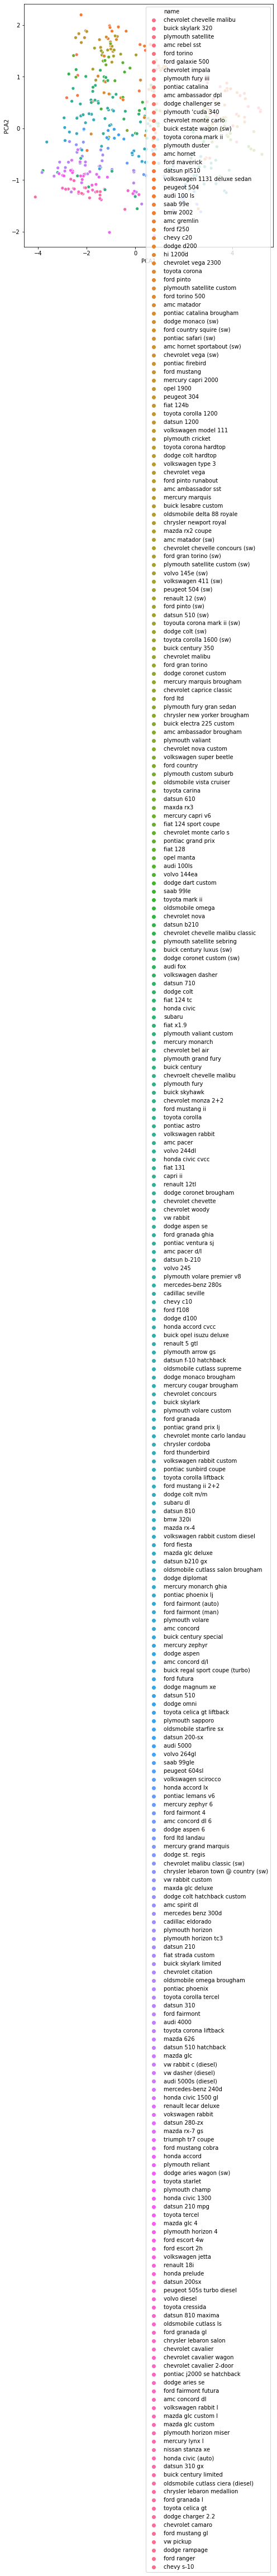

In [43]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()